# Data import

In [348]:
import pandas as pd 
df = pd.read_csv("C:/Users/Madhuri/Desktop/DS-ML/python/Data/netflix.csv")

### Shape

In [349]:
df.shape

(8807, 12)

 ### Columns , Data types and non null count

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Missing values count Column wise

In [351]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [352]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3123,s3124,Movie,Ronny Chieng: Asian Comedian Destroys America!,Sebastian DiNatale,Ronny Chieng,United States,"December 17, 2019",2019,TV-MA,63 min,Stand-Up Comedy,"Ronny Chieng (""The Daily Show,"" ""Crazy Rich As..."
2834,s2835,Movie,I am Jonas,Christophe Charrier,"Félix Maritaud, Nicolas Bauwens, Tommy Lee Baï...",France,"March 6, 2020",2019,TV-MA,82 min,"Dramas, Independent Movies, International Movies","A turbulent past haunts Jonas, who recalls his..."
5259,s5260,TV Show,Satu Hari,NaN,"Sara Ali, Remy Ishak, Rita Rudaini, Mirza Sali...",NaN,"September 29, 2017",2014,TV-PG,1 Season,"International TV Shows, TV Dramas",A man haunted by his wife's affair moves to Sa...
6923,s6924,TV Show,Happyish,NaN,"Steve Coogan, Kathryn Hahn, Sawyer Shipman, Br...",United States,"July 1, 2016",2015,TV-MA,1 Season,"TV Comedies, TV Dramas",A middle-aged adman is shaken up by his new bo...
4194,s4195,Movie,The Doll,Rocky Soraya,"Shandy Aulia, Denny Sumargo, Sara Wijayanto, V...",Indonesia,"January 15, 2019",2016,TV-MA,106 min,"Horror Movies, International Movies",Eerie things begin to happen after a man gives...


### Movie Release Year range 

In [353]:
min = df["release_year"].min()
max = df["release_year"].max()
print("Min Year ",min)
print("Max Year",max)

Min Year  1925
Max Year 2021


### Show Type

In [354]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

### Ratings

In [355]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

### Updating missing null values in duration with miss-algined values

In [356]:
mask = df["duration"].isnull()
df.loc[mask, 'duration'] = df.loc[mask, 'rating']
df[df["director"] == "Louis C.K."]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


### Updating <b>director</b> column null values to "Unknown Director"

In [357]:
mask = df["director"].isnull()
df.loc[mask,"director"] = "Unknown Director"
df["director"].value_counts()

director
Unknown Director                  2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

### Updating <b>cast</b> column null values to "Unknown Actor"

In [358]:
mask = df["cast"].isnull()
df.loc[mask,"cast"] = "Unknown Actor"

In [359]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added       10
release_year      0
rating            4
duration          0
listed_in         0
description       0
dtype: int64

In [360]:
mask = df["date_added"].isnull()
df.loc[mask,"date_added"] = "June 1, "+ df.loc[mask,"release_year"].astype(str)

In [361]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added        0
release_year      0
rating            4
duration          0
listed_in         0
description       0
dtype: int64

### Changing the data type of date_added column

In [362]:
df["date_added"] = df["date_added"].str.strip()

In [363]:
df["date_added"] = pd.to_datetime(df["date_added"],infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


C:\Users\Madhuri\AppData\Local\Temp\ipykernel_2004\208798669.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["date_added"] = pd.to_datetime(df["date_added"],infer_datetime_format=True)


In [364]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added        0
release_year      0
rating            4
duration          0
listed_in         0
description       0
dtype: int64

In [365]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Clean up the director column

In [366]:
df_dir_holder = pd.DataFrame(df["director"].apply( lambda value: [x.strip() for x in str(value).split(',')]).tolist(),index=df["show_id"])
df_dir = df_dir_holder.stack().reset_index()
df_dir.drop("level_1",axis = 1 , inplace = True)
df_dir.rename(columns = {0:"director"},inplace = True)
df_dir.sample(5)

,show_id,director
85,s79,Delhiprasad Deenadayalan
8290,s7625,Unknown Director
1532,s1420,Juliet May
8219,s7559,Heidi Saman
534,s487,Kevin Munroe


### Clean up the cast column

In [367]:
df_cast_holder = pd.DataFrame(df["cast"].apply( lambda value: [x.strip() for x in str(value).split(',')]).tolist(),index=df["show_id"])
df_cast = df_cast_holder.stack().reset_index()
df_cast.drop("level_1",axis = 1 , inplace = True)
df_cast.rename(columns = {0:"cast"},inplace = True)
df_cast.sample(5)

,show_id,cast
38278,s5058,Joanna Vanderham
47672,s6427,Chafurin
43786,s5889,Joel de la Fuente
13972,s1726,Joke Silva
29100,s3724,Tomokazu Sugita


### Clean up the country column

In [368]:
#df_country_holder = pd.DataFrame(df["country"].apply( lambda value: str(value).split(",")).tolist(),index=df["show_id"])
df_country_holder = pd.DataFrame(df["country"].apply( lambda value: [x.strip() for x in str(value).split(',')]).tolist(),index=df["show_id"])
df_country = df_country_holder.stack().reset_index()
df_country.drop("level_1",axis = 1 , inplace = True)
df_country.rename(columns = {0:"country"},inplace = True)
df_country['country'].replace(['nan'], ['Unknown'], inplace = True)
df_country.sample(5)

,show_id,country
7286,s6102,Unknown
2014,s1652,Canada
8477,s7012,Croatia
8583,s7090,Japan
7052,s5912,United States


In [369]:
df_country['country']

0        United States
1         South Africa
2              Unknown
3              Unknown
4                India
             ...      
10845    United States
10846          Unknown
10847    United States
10848    United States
10849            India
Name: country, Length: 10850, dtype: object

### Clean up the Genre column

In [370]:
df_genre_holder = pd.DataFrame(df["listed_in"].apply( lambda value: [x.strip() for x in str(value).split(',')]).tolist(),index=df["show_id"])
df_genre = df_genre_holder.stack().reset_index()
df_genre.drop("level_1",axis = 1 , inplace = True)
df_genre.rename(columns = {0:"listed_in"},inplace = True)
df_genre.sample(5)

,show_id,listed_in
17799,s8099,Romantic Movies
6108,s2762,International TV Shows
9123,s4073,International Movies
7080,s3183,TV Action & Adventure
2777,s1267,Independent Movies


### Merge back to main dataframe - 1

In [371]:
df_merge_1 = df_dir.merge(df_cast,on="show_id",how="inner")
df_merge_1.sample(5)

,show_id,director,cast
33654,s4018,Maryo J. De los Reyes,Dante Rivero
36805,s4456,Tigmanshu Dhulia,Irrfan Khan
15404,s1762,Richard Greenberg,Daniel Stern
65408,s8151,Julien Seri,Fanny Valette
69942,s8697,Steven Spielberg,Rainer Bock


### Merge back to main dataframe - 2

In [372]:
df_merge_2 = df_merge_1.merge(df_country,on="show_id",how="inner")
df_merge_2.sample(5)

,show_id,director,cast,country
23128,s2160,Laura Terruso,Jordan Fisher,United States
63189,s6442,Umer Adil,Syra Shehroz,Pakistan
35305,s3341,Unknown Director,Yoshimasa Hosoya,Japan
30794,s2918,Unknown Director,Sheeba Chaddha,India
12253,s1112,Nick Moore,Linzey Cocker,United States


### Merge back to main dataframe - 3

In [373]:
df_merge_3 = df_merge_2.merge(df_genre,on="show_id",how="inner")
df_merge_3.sample(5)

,show_id,director,cast,country,listed_in
182871,s8022,Unknown Director,Juan Diego Sánchez,Mexico,Spanish-Language TV Shows
67238,s2825,Unknown Director,Bergur Ebbi,Iceland,International TV Shows
38088,s1569,Jun Lana,Eddie Garcia,Philippines,International Movies
112861,s4874,Robert Vince,David DeLuise,Canada,Music & Musicals
112837,s4874,Robert Vince,Makenzie Moss,Japan,Music & Musicals


### Merge back to main dataframe - Final

In [374]:
df_final_data = df_merge_3.merge(df[['show_id', 'type','title', 'date_added','release_year', 'rating', 'duration',"description"]],
                                 on="show_id",how="inner")
df_final_data.sample(5)

,show_id,director,cast,country,listed_in,type,title,date_added,release_year,rating,duration,description
189534,s8274,Cecilia Atán,Claudio Rissi,Argentina,Dramas,Movie,The Desert Bride,2018-11-08,2017,TV-14,78 min,"While traveling across Argentina to a new job,..."
12058,s493,Scott Speer,Patrick Schwarzenegger,United States,Dramas,Movie,Midnight Sun,2021-07-08,2018,PG-13,91 min,"Born with a fatal sensitivity to sunlight, a s..."
150819,s6647,Unknown Director,Liv Hewson,United States,TV Dramas,TV Show,Dramaworld,2016-05-23,2016,TV-14,1 Season,A huge fan of a Korean TV drama is transported...
117470,s5091,Unknown Director,Tamsin Greig,United States,Classic & Cult TV,TV Show,Episodes,2018-01-06,2017,TV-MA,5 Seasons,Hoping to create an American version of their ...
189316,s8263,Unknown Director,Robert Clotworthy,United States,Docuseries,TV Show,The Curse of Oak Island,2019-09-15,2016,TV-PG,1 Season,"On an ominous island off of Nova Scotia, two b..."


In [375]:
df_final_data.shape

(202065, 12)

In [376]:
df_h1 = df_final_data[df_final_data["rating"].isnull()]
df_h1.sample(5)

,show_id,director,cast,country,listed_in,type,title,date_added,release_year,rating,duration,description
135172,s5990,Unknown Director,Oprah Winfrey,Unknown,Movies,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,2017-01-26,2017,NaN,37 min,Oprah Winfrey sits down with director Ava DuVe...
154427,s6828,Unknown Director,Hisako Kanemoto,Japan,International TV Shows,TV Show,Gargantia on the Verdurous Planet,2016-12-01,2013,NaN,1 Season,"After falling through a wormhole, a space-dwel..."
154466,s6828,Unknown Director,Karen Strassman,Japan,Anime Series,TV Show,Gargantia on the Verdurous Planet,2016-12-01,2013,NaN,1 Season,"After falling through a wormhole, a space-dwel..."
154461,s6828,Unknown Director,Michelle Ruff,Japan,International TV Shows,TV Show,Gargantia on the Verdurous Planet,2016-12-01,2013,NaN,1 Season,"After falling through a wormhole, a space-dwel..."
154444,s6828,Unknown Director,Ayumi Fujimura,Japan,Anime Series,TV Show,Gargantia on the Verdurous Planet,2016-12-01,2013,NaN,1 Season,"After falling through a wormhole, a space-dwel..."


In [377]:
df_final_data = df_final_data.sort_values("type")
df_final_data.sample(10)

,show_id,director,cast,country,listed_in,type,title,date_added,release_year,rating,duration,description
129464,s5676,Unknown Director,Min-jin Jung,South Korea,International TV Shows,TV Show,Miss Panda & Mr. Hedgehog,2016-12-15,2012,TV-PG,1 Season,When a gifted patissier with a gloomy past mee...
149075,s6581,Tanuj Bhramar,Ekavali Khanna,India,Dramas,Movie,Dear Dad,2019-03-02,2016,TV-14,83 min,A father and son bond on an impromptu road tri...
54696,s2312,Bruce Beresford,Annabeth Gish,Canada,Thrillers,Movie,Double Jeopardy,2020-07-01,1999,R,105 min,After being framed and serving time for her hu...
114315,s4942,Unknown Director,Alfred Enoch,Australia,Romantic TV Shows,TV Show,Troy,2018-04-06,2018,TV-MA,1 Season,Searching for the woman promised to him by Aph...
11260,s461,Chris Buck,Sal Masekela,United States,Children & Family Movies,Movie,Surf's Up,2021-07-15,2007,PG,86 min,This Oscar-nominated animated comedy goes behi...
34372,s1404,Cris D'Amato,Roberto Bonfim,Brazil,Children & Family Movies,Movie,Double Dad,2021-01-15,2020,TV-G,105 min,"While her mom is away, a teen sneaks out of th..."
153679,s6795,Noah Baumbach,Josh Hamilton,United States,Comedies,Movie,Frances Ha,2017-10-01,2012,R,86 min,Determined to make it as a modern dancer in Ne...
87514,s3664,Unknown Director,Kana Asumi,Japan,International TV Shows,TV Show,Angel Beats!,2019-07-15,2010,TV-PG,1 Season,In a high school that's a way station to the a...
177644,s7804,Anurag Singh,Pavan Malhotra,India,International Movies,Movie,Punjab 1984,2017-11-01,2014,TV-14,158 min,"During a time of political turmoil, a mother g..."
88358,s3714,Sujoy Ghosh,Masood Akhtar,India,Music & Musicals,Movie,Kahaani,2019-06-26,2012,TV-14,122 min,"Pregnant and alone in the city of Kolkata, a w..."


In [379]:
df_final_data.isnull().sum()

show_id          0
director         0
cast             0
country          0
listed_in        0
type             0
title            0
date_added       0
release_year     0
rating          67
duration         0
description      0
dtype: int64

In [380]:
df_final_data.fillna(method="ffill",inplace = True)
df_final_data.isnull().sum()

C:\Users\Madhuri\AppData\Local\Temp\ipykernel_2004\1609901970.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_final_data.fillna(method="ffill",inplace = True)


show_id         0
director        0
cast            0
country         0
listed_in       0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
dtype: int64

### Updating country cloumn "Unknown" to related values using director or cast columns.
### If unable to generate a country using those default value "Unknown" will be retained.

In [381]:
def get_country(lst):
    if len(lst) > 0:
        return lst[0]
    else:
        return "Unknown"

In [382]:
def set_country():
    for i,row in df_final_data.iterrows():
        country = df_final_data.at[i,"country"]
        value = "Unknown"
        if country == value:
            dir = df_final_data.at[i,"director"]
            actor = df_final_data.at[i,"cast"]
            if dir == "Unknown Director" and actor == "Unknown Actor":
                continue
            elif dir != "Unknown Director":
                lst = df_final_data[df_final_data["director"] == dir]["country"].mode().tolist()
                value = get_country(lst)
            if value == "Unknown":
                lst = df_final_data[df_final_data["cast"] == actor]["country"].mode().tolist()
                value = get_country(lst)   
            df_final_data.at[i,"country"] = value
    return "Update completed"

In [383]:
set_country()

'Update completed'

### Update the rating for misaligned records. Show is about stand  up comedy. This will be part of TV-MA. So updating the same

In [384]:
mask = df_final_data["rating"] == "74 min"
df_final_data.loc[mask,"rating"] = "TV-MA"

In [385]:
mask = df_final_data["rating"] == "66 min"
df_final_data.loc[mask,"rating"] = "TV-MA"

In [386]:
mask = df_final_data["rating"] == "84 min"
df_final_data.loc[mask,"rating"] = "TV-MA"

In [387]:
df_final_data[df_final_data["director"] == "Louis C.K."]

,show_id,director,cast,country,listed_in,type,title,date_added,release_year,rating,duration,description
131782,s5814,Louis C.K.,Louis C.K.,United States,Movies,Movie,Louis C.K.: Live at the Comedy Store,2016-08-15,2015,TV-MA,66 min,The comic puts his trademark hilarious/thought...
131648,s5795,Louis C.K.,Louis C.K.,United States,Movies,Movie,Louis C.K.: Hilarious,2016-09-16,2010,TV-MA,84 min,Emmy-winning comedy writer Louis C.K. brings h...
126582,s5542,Louis C.K.,Louis C.K.,United States,Movies,Movie,Louis C.K. 2017,2017-04-04,2017,TV-MA,74 min,"Louis C.K. muses on religion, eternal love, gi..."


In [388]:
df_final_data["rating"].unique()

array(['PG-13', 'TV-MA', 'TV-14', 'TV-PG', 'R', 'TV-Y', 'PG', 'TV-G',
       'TV-Y7', 'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR'], dtype=object)

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns

In [390]:
value_counts = df["type"].value_counts()
print(value_counts)
percentage_counts = ((value_counts / len(df["type"])) * 100).round(2)
result = pd.DataFrame({'Count': value_counts, 'Percentage': percentage_counts})
result

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


,Count,Percentage
type,,
Movie,6131,69.62
TV Show,2676,30.38


In [391]:
df_without_duplicate  = df_final_data.drop_duplicates(subset=["type", "show_id"])
value_counts =df_without_duplicate["type"].value_counts()
percentage_counts = ((value_counts / len(df_without_duplicate["type"])) * 100).round(2)
result = pd.DataFrame({'Count': value_counts, 'Percentage': percentage_counts})
result

,Count,Percentage
type,,
Movie,6131,69.62
TV Show,2676,30.38


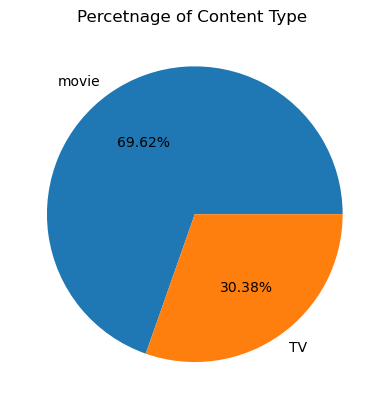

In [392]:
plt.pie(result["Percentage"], labels=["movie","TV"], autopct='%1.2f%%')
plt.title('Percetnage of Content Type ')
plt.show()

In [393]:
df_final_data["added_year"] = pd.DatetimeIndex(df_final_data['date_added']).year

In [398]:
df_year_values  = df_final_data.drop_duplicates(subset=["show_id"])
value_counts =df_year_values["added_year"].value_counts()
value_counts

added_year
2019    2016
2020    1879
2018    1650
2021    1498
2017    1188
2016     430
2015      84
2014      24
2011      13
2013      12
2012       4
2008       3
2009       2
2010       2
2003       2
Name: count, dtype: int64

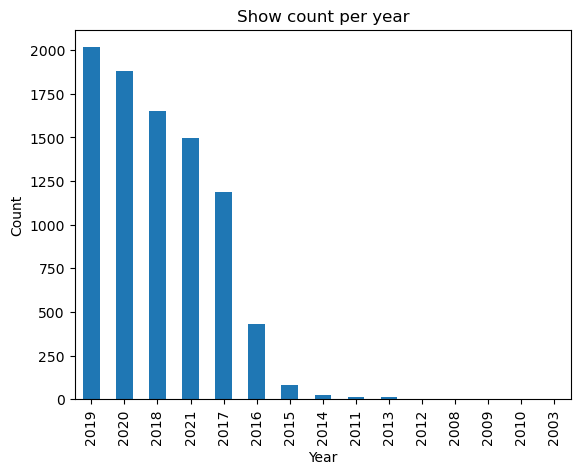

In [399]:
value_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Show count per year')
plt.show()

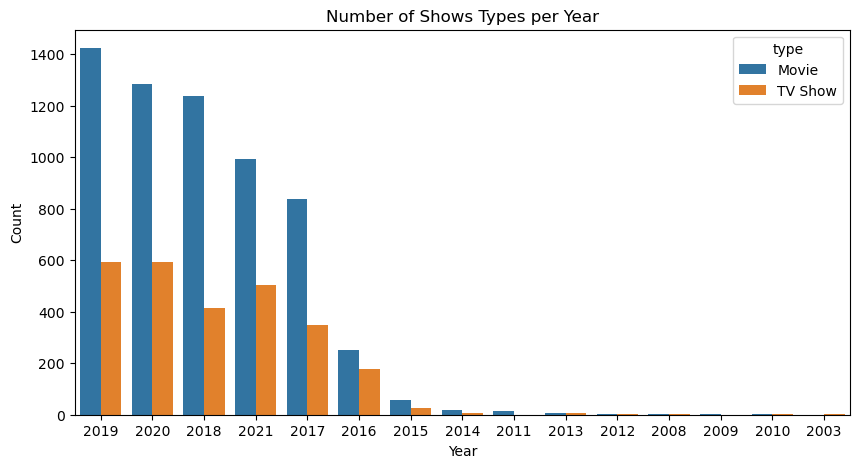

In [432]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_year_values , x="added_year", hue="type",order = df_year_values["added_year"].value_counts().index)
plt.title("Number of Shows Types per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [402]:
df_country_values  = df_final_data.drop_duplicates(subset=["show_id","country"])

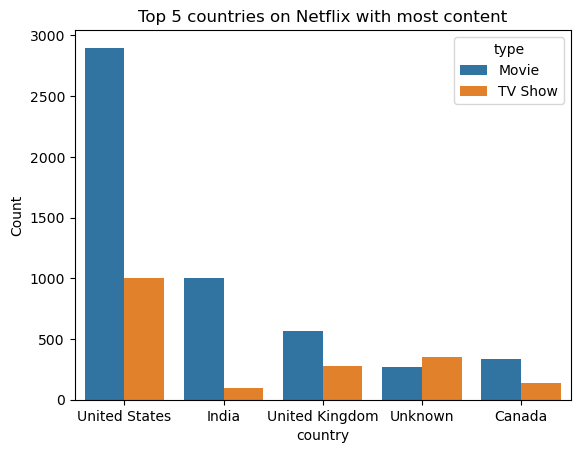

In [403]:
sns.countplot(data =df_country_values, x="country", order=df_country_values["country"].value_counts().index[0:5], hue="type")
plt.title("Top 5 countries on Netflix with most content")
plt.xlabel("country")
plt.ylabel("Count")
plt.show()

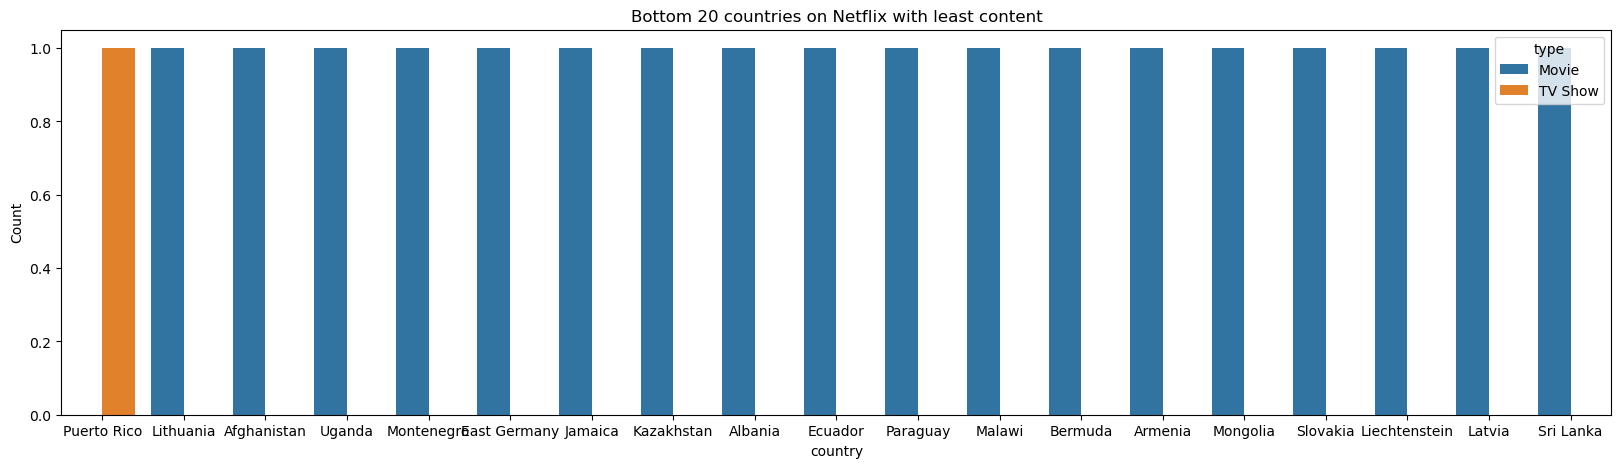

In [457]:
plt.figure(figsize=(20, 5))
sns.countplot(data =df_country_values, x="country", order=df_country_values["country"].value_counts().index[:-20:-1], hue="type")
plt.title("Bottom 20 countries on Netflix with least content")
plt.xlabel("country")
plt.ylabel("Count")
plt.show()

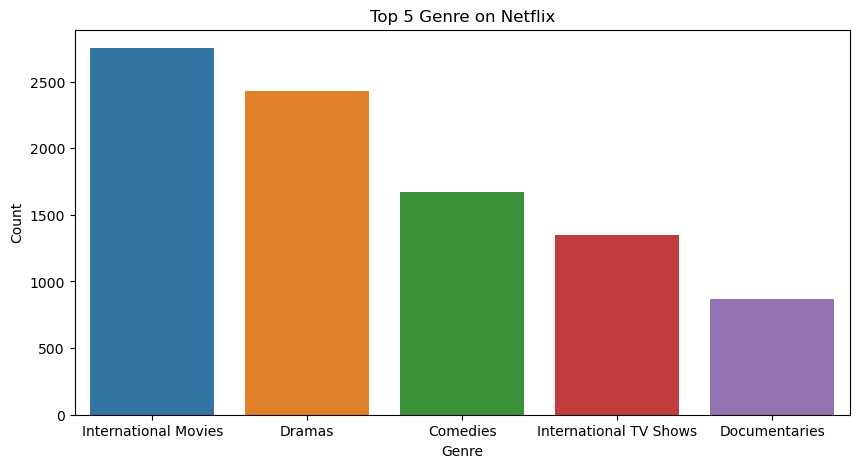

In [415]:
plt.figure(figsize=(10, 5))
df_genre_values  = df_final_data.drop_duplicates(subset=["show_id","listed_in"])
sns.countplot(data =df_genre_values, x="listed_in", order=df_genre_values["listed_in"].value_counts().index[0:5])
plt.title("Top 5 Genre on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [407]:
df_rating_values  = df_final_data.drop_duplicates(subset=["show_id","rating"])

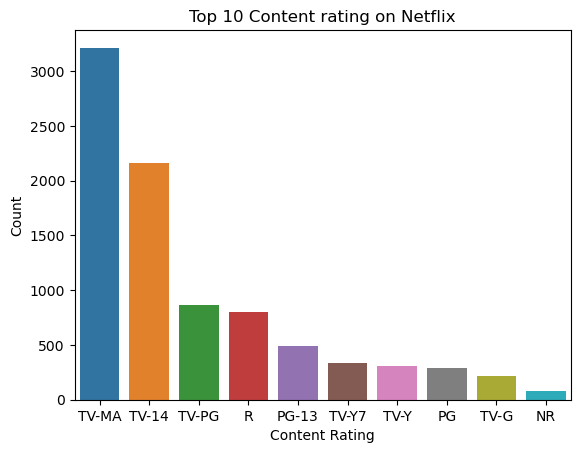

In [417]:
sns.countplot(data =df_rating_values, x="rating", order=df_rating_values["rating"].value_counts().index[0:10])
plt.title("Top 10 Content rating on Netflix")
plt.xlabel("Content Rating")
plt.ylabel("Count")
plt.show()

In [418]:
df_director_values  = df_final_data.drop_duplicates(subset=["show_id","director"])

In [428]:
value_counts =df_director_values["director"].value_counts()
value_counts

director
Unknown Director    2634
Rajiv Chilaka         22
Jan Suter             21
Raúl Campos           19
Suhas Kadav           16
                    ... 
James Barr             1
Michael Tolajian       1
Anurag Singh           1
Luis Prieto            1
Sharon Grimberg        1
Name: count, Length: 4994, dtype: int64

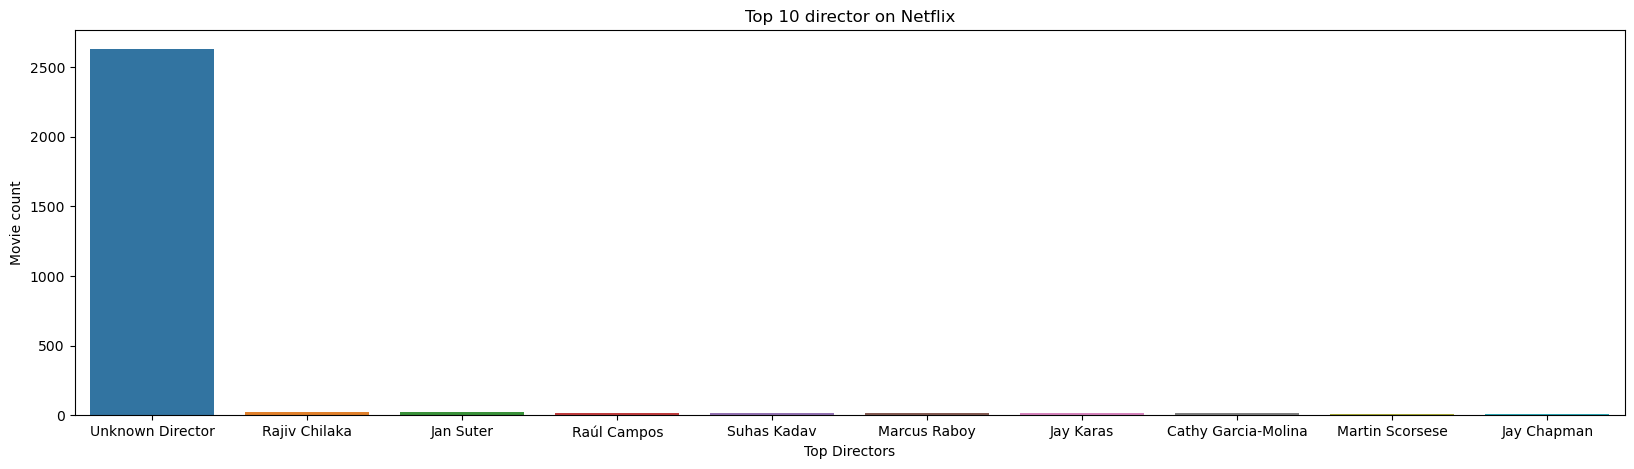

In [424]:
plt.figure(figsize=(20, 5))
sns.countplot(data =df_director_values, x="director", order=df_director_values["director"].value_counts().index[0:10])
plt.title("Top 10 director on Netflix")
plt.xlabel("Top Directors")
plt.ylabel("Movie count")
plt.show()

In [437]:
df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202065 entries, 0 to 166087
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   director      202065 non-null  object        
 2   cast          202065 non-null  object        
 3   country       202065 non-null  object        
 4   listed_in     202065 non-null  object        
 5   type          202065 non-null  object        
 6   title         202065 non-null  object        
 7   date_added    202065 non-null  datetime64[ns]
 8   release_year  202065 non-null  int64         
 9   rating        202065 non-null  object        
 10  duration      202065 non-null  object        
 11  description   202065 non-null  object        
 12  added_year    202065 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(10)
memory usage: 28.9+ MB


### Check difference between content release year and content onboarding to netflix

In [444]:
dr_year_diff  = df_final_data.drop_duplicates(subset=["show_id"])

In [455]:
dr_year_diff.nlargest(10,"content_onboard_diff")

,show_id,director,cast,country,listed_in,type,title,date_added,release_year,rating,duration,description,added_year,content_onboard_diff
99245,s4251,Unknown Director,Unknown Actor,Unknown,TV Shows,TV Show,Pioneers: First Women Filmmakers*,2018-12-30,1925,TV-14,1 Season,This collection restores films from women who ...,2018,93
32601,s1332,Unknown Director,Unknown Actor,United States,TV Shows,TV Show,Five Came Back: The Reference Films,2021-02-09,1945,TV-MA,1 Season,This collection includes 12 World War II-era p...,2021,76
187540,s8206,John Ford,Henry Fonda,United States,Classic Movies,Movie,The Battle of Midway,2017-03-31,1942,TV-14,18 min,Director John Ford captures combat footage of ...,2017,75
177451,s7791,Frank Capra,Unknown Actor,United States,Classic Movies,Movie,Prelude to War,2017-03-31,1942,TV-14,52 min,Frank Capra's documentary chronicles the rise ...,2017,75
198731,s8661,John Ford,Unknown Actor,United States,Classic Movies,Movie,Undercover: How to Operate Behind Enemy Lines,2017-03-31,1943,TV-PG,61 min,This World War II-era training film dramatizes...,2017,74
200898,s8764,John Huston,Unknown Actor,United States,Documentaries,Movie,WWII: Report from the Aleutians,2017-03-31,1943,TV-PG,45 min,Filmmaker John Huston narrates this Oscar-nomi...,2017,74
200463,s8740,Frank Capra,Unknown Actor,United States,Documentaries,Movie,Why We Fight: The Battle of Russia,2017-03-31,1943,TV-PG,82 min,This installment of Frank Capra's acclaimed do...,2017,74
198259,s8641,Roy Boulting,Burgess Meredith,United States,Documentaries,Movie,Tunisian Victory,2017-03-31,1944,TV-14,76 min,British and American troops join forces to lib...,2017,73
193339,s8420,William Wyler,Unknown Actor,United States,Documentaries,Movie,The Memphis Belle: A Story of a\nFlying Fortress,2017-03-31,1944,TV-PG,40 min,This documentary centers on the crew of the B-...,2017,73
193621,s8437,Stuart Heisler,Unknown Actor,United States,Classic Movies,Movie,The Negro Soldier,2017-03-31,1944,TV-14,40 min,This documentary urged African Americans to en...,2017,73


## Summary: 
### There are more movies than TV series both growing from 2015. 70% of the content are Movies and the rest are TV shows
### Countries like USA,India and UK has the most number of content on Netflix.
### Genre like International Movies,Drama are the highest content type on Netflix.
### Mature Content , 14 year and above are most content on Netflix.
### Rajiv Chilaka and Jan suter are the top directors on netflix.

## Suggestion:
### There are more than 20 countries who has very little content. By increasing the content we can onboard more users and retain them as well.
### The difference between movie content and TV show are growing.It will be easy to retain a User if there are more TV shows across all the genre.
### There are lots of missing values like director , country where the content was added. If we can reduce these unknown the better we can analyse.
### The duration from the content released and added onto netflix should be reduced so that it can help in user retention.